Velocity versus Heliocentric Distance 2d Histogram

In [1]:
import numpy as np
import pylab as plt
import pandas as pd
import seaborn as sns

from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy import signal

In [2]:
fname = '/home/ellie/research/lsst/MPC_Objects_vel.csv'
df = pd.read_csv(fname)

In [3]:
vx = np.array(df['heliocentricVX'])
vy = np.array(df['heliocentricVY'])
r = np.array(df['heliocentricDist'])

print(len(vx))
print(len(r))

1237149
1237149


In [4]:
r_cutoff = 10
df_low_r = df[df['heliocentricDist'] < r_cutoff]
df_hi_r = df[df['heliocentricDist'] > r_cutoff]

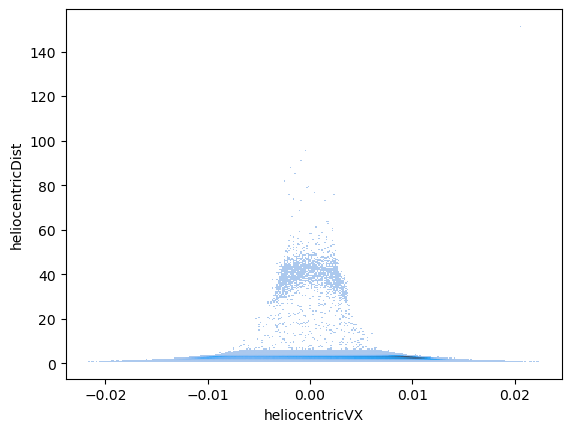

In [9]:
sns.histplot(df, x=df['heliocentricVX'], y=df['heliocentricDist'], bins=300)
#plt.ylim(0, 80)
plt.savefig('vx_histogram.png')

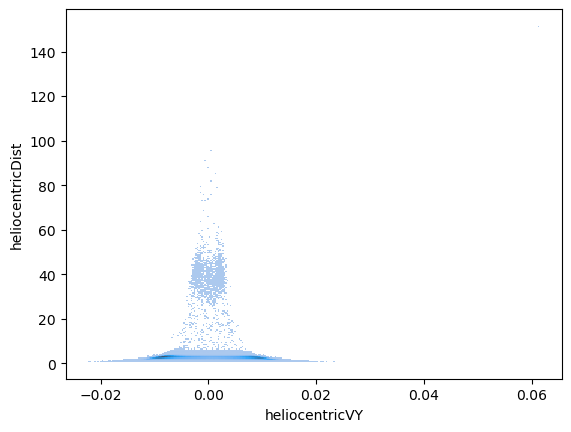

In [10]:
sns.histplot(df, x=df['heliocentricVY'], y=df['heliocentricDist'], bins=300)
#plt.ylim(0, 80)
plt.savefig('vy_histogram.png')

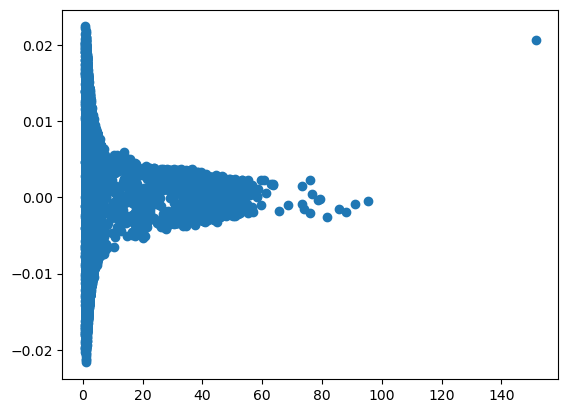

In [14]:
plt.scatter(r, vx)
plt.show()

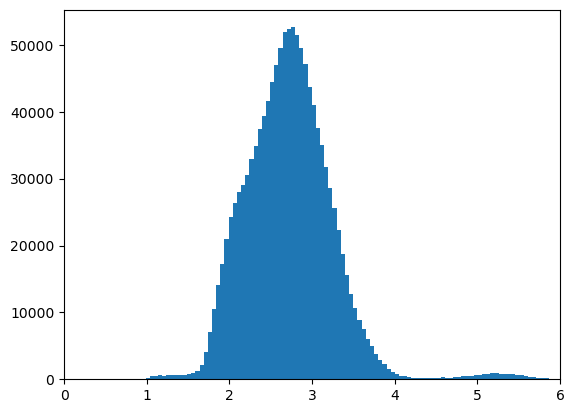

In [19]:
plt.hist(r, bins=3000)
plt.xlim(0, 6)
plt.show()

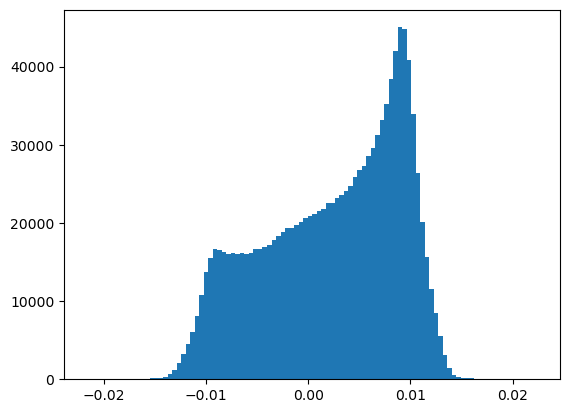

In [27]:
plt.hist(vx, bins=100)
plt.show()
plt.close()

In [22]:
def Gauss(x, A, B):
    return A*np.exp(-B * x**2)

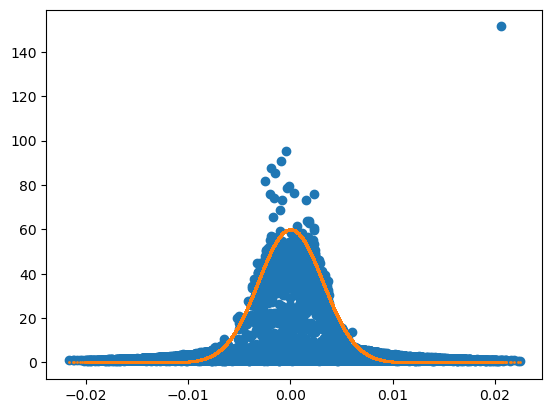

In [56]:
parameters, _ = curve_fit(Gauss, vx, r)
fit_A, fit_B = parameters
gauss_vx = Gauss(vx, 60, 50000)
plt.scatter(vx, r)
plt.scatter(vx, gauss_vx, s=1)
plt.show()